# Regression 

AI Black Belt - Yellow (June 2019).

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In regression we are trying to predict a continuous output variable -- in contrast to the nominal variables we were predicting in the previous classification examples. 

Let's start with a simple toy example with one feature dimension (explanatory variable) and one target variable. We will create a dataset out of a sine curve with some noise:

In [2]:
df = pd.DataFrame({"x":np.linspace(-3, 3, 100)})
print(df['x'].values)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [3]:
rng = np.random.RandomState(42)
df["y"] = df["x"] + np.sin(4 * df["x"]) + rng.uniform(size=df.shape[0])
df

,x,y
0,-3.000000,-2.088887
1,-2.939394,-1.265224
2,-2.878788,-1.278765
3,-2.818182,-1.257685
4,-2.757576,-1.602160
5,-2.696970,-1.562466
6,-2.636364,-1.677885
7,-2.575758,-0.939957
8,-2.515152,-1.320193
9,-2.454545,-1.363138


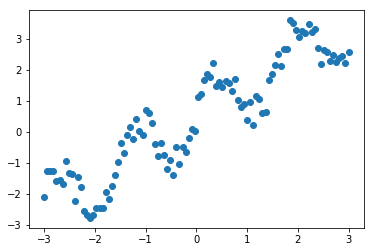

In [4]:
plt.plot(df["x"], df["y"], 'o');

## Linear regression

The first model that we will introduce is the so-called simple linear regression. Here, we want to fit a line to the data, so that the error over the data points is minimized. 

The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

In [5]:
X = df[["x"]]
y = df[["y"]]

Again, we start by splitting our dataset into a training (75%) and a test set (25%):

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Next, we use the learning algorithm implemented in `LinearRegression` to **fit a regression model to the training data**:

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Since our regression model is a linear one, the relationship between the target variable (y) and the feature variable (x) is defined as 

$$y = \text{weight} \times x + \text{intercept .}$$

In our case, for the model fit above, we have:

In [8]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

Weight coefficients:  [[0.90211711]]
y-axis intercept:  [0.44840975]


Plugging in the min and max values into thos equation, we can plot the regression fit to our training data:

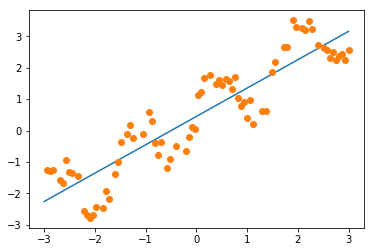

In [9]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o');

Similar to the estimators for classification in the previous notebooks, we use the `predict` method to predict the target variable. We expect these predicted values to fall onto the line that we plotted previously:

In [10]:
y_pred_train = regressor.predict(X_train)

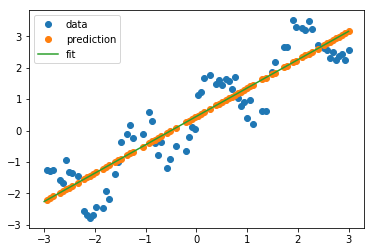

In [11]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best')

As we can see in the plot above, the line is able to capture the general slope of the data, but not many details.

Next, let's try the test set:

In [12]:
y_pred_test = regressor.predict(X_test)

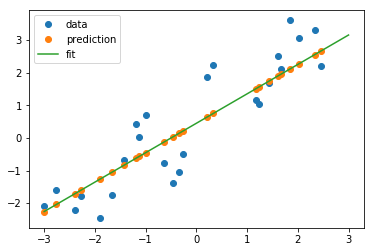

In [13]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
plt.legend(loc='best');

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R<sup>2</sup> score. 

In [14]:
regressor.score(X_test, y_test)

0.7994321405079685

Another popular way would be the Mean Squared Error (MSE). As its name implies, the MSE is simply the average squared difference over the predicted and actual target values

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\text{predicted}_i - \text{true}_i)^2$$

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Add a (non-linear) feature containing  `sin(4x)` to `X` and redo the fit as a new column to X_train (and X_test). Visualize the predictions with this new richer, yet linear, model.
      </li>
      <li>
      Hint: you can use `np.concatenate(A, B, axis=1)` to concatenate two matrices A and B horizontal (to combine the columns).
      </li>
    </ul>
</div>

Weight coefficients:  [[0.99030306 1.0129967 ]]
y-axis intercept:  [0.45963936]


0.9660402506947787

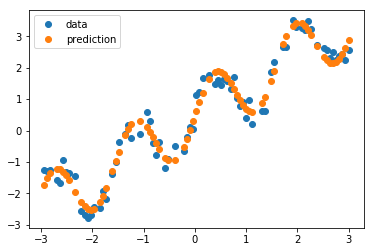

In [16]:
# %load solutions/day3-02-01.py


# Add a non linear term in the dataframe
df["sin4x"] = np.sin(4*df["x"])

# Build X,y matrices and split them in train/test
X = df[["x", "sin4x"]]
y = df[["y"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Check the coeeficients
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

# Compute Prediction
y_pred_train = regressor.predict(X_train)

# Show the prediction on a plot
plt.plot(X_train["x"], y_train, 'o', label="data")
plt.plot(X_train["x"], y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

# Score the model
regressor.score(X_test, y_test)



## KNeighborsRegression

As for classification, we can also use a K-nearest neighbor algorithm for regression. In this setting, we can simply take the output of the nearest point, or we can average several nearest points. This method is less popular for regression than for classification, but it is still a good baseline.

In [17]:
X = df[["x"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

Again, let us look at the behavior on training and test set:

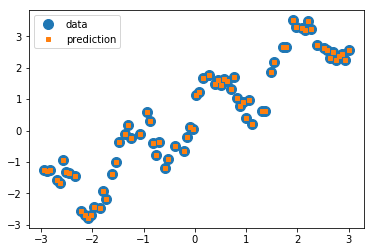

In [19]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor!

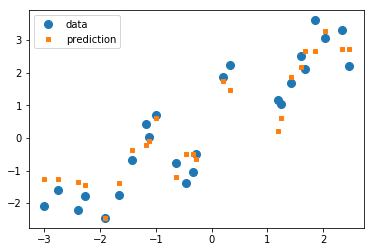

In [20]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

On the test set, we also do a better job of capturing the variation, but our estimates look much messier than before.
Let us look at the R<sup>2</sup> score:

In [21]:
kneighbor_regression.score(X_test, y_test)

0.9166293022467948

Much better than before! Here, the linear model was not a good fit for our problem; it was lacking in complexity and thus under-fit our data.

<div class="alert alert-success">
    <b>EXERCISE</b>:

Check on <a href=http://scikit-learn.org/stable/supervised_learning.html#supervised-learning>scikit-learn documentation</a> what other regression model exist, choose one an try it to see if it improves the accuracy.

</div>    